In [ ]:
pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 7.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=5d8b2811101b0c1690b111fbb11a08860bc482c95a256aba5544db19203f9db7
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import skfuzzy as fuzzy

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

Задание 1.
# Построить график с тремя термами Низкий Средний и Высокий для лингвистической переменной "Цена акции", используя три классические формы.

In [ ]:
def MF_x1(a, b, c, x):
  if a < b < c:
    if a <= x <= b: return 1 - (b-x)/(b-a)
    if b <= x <= c: return 1 - (x-b)/(c-b)
    if x > c or x < a: return 0
  else: pass

def MF_x2(a, b, c, d, x):
  if a < b < c < d:
    if a <= x <= b: return 1 - (b-x)/(b-a)
    if b <= x <= c: return 1
    if c <= x <= d: return 1 - (x-c)/(d-c)
    if x > d or x < a: return 0
  else: pass

def MF_x3(c, sigma, x):
  return np.exp(-((x-c)/sigma)**2)

In [ ]:
f_a = [MF_x1(-7,-4,1,i) for i in np.linspace(-10, 10)]
f_b = [MF_x2(-4,2,3,4,i) for i in np.linspace(-10, 10)]
f_c = [MF_x3(-1,2,i) for i in np.linspace(-10, 10)]

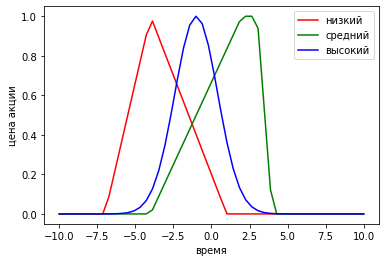

In [ ]:
plt.plot(np.linspace(-10, 10), f_a, 'r')
plt.plot(np.linspace(-10, 10), f_b, 'g')
plt.plot(np.linspace(-10, 10), f_c, 'b')

plt.ylabel('цена акции')
plt.xlabel('время')

plt.legend(['низкий', 'средний', 'высокий'])

Задание 2. 
# Построить графики из изображения и выполнить нечеткий вывод по изображению.


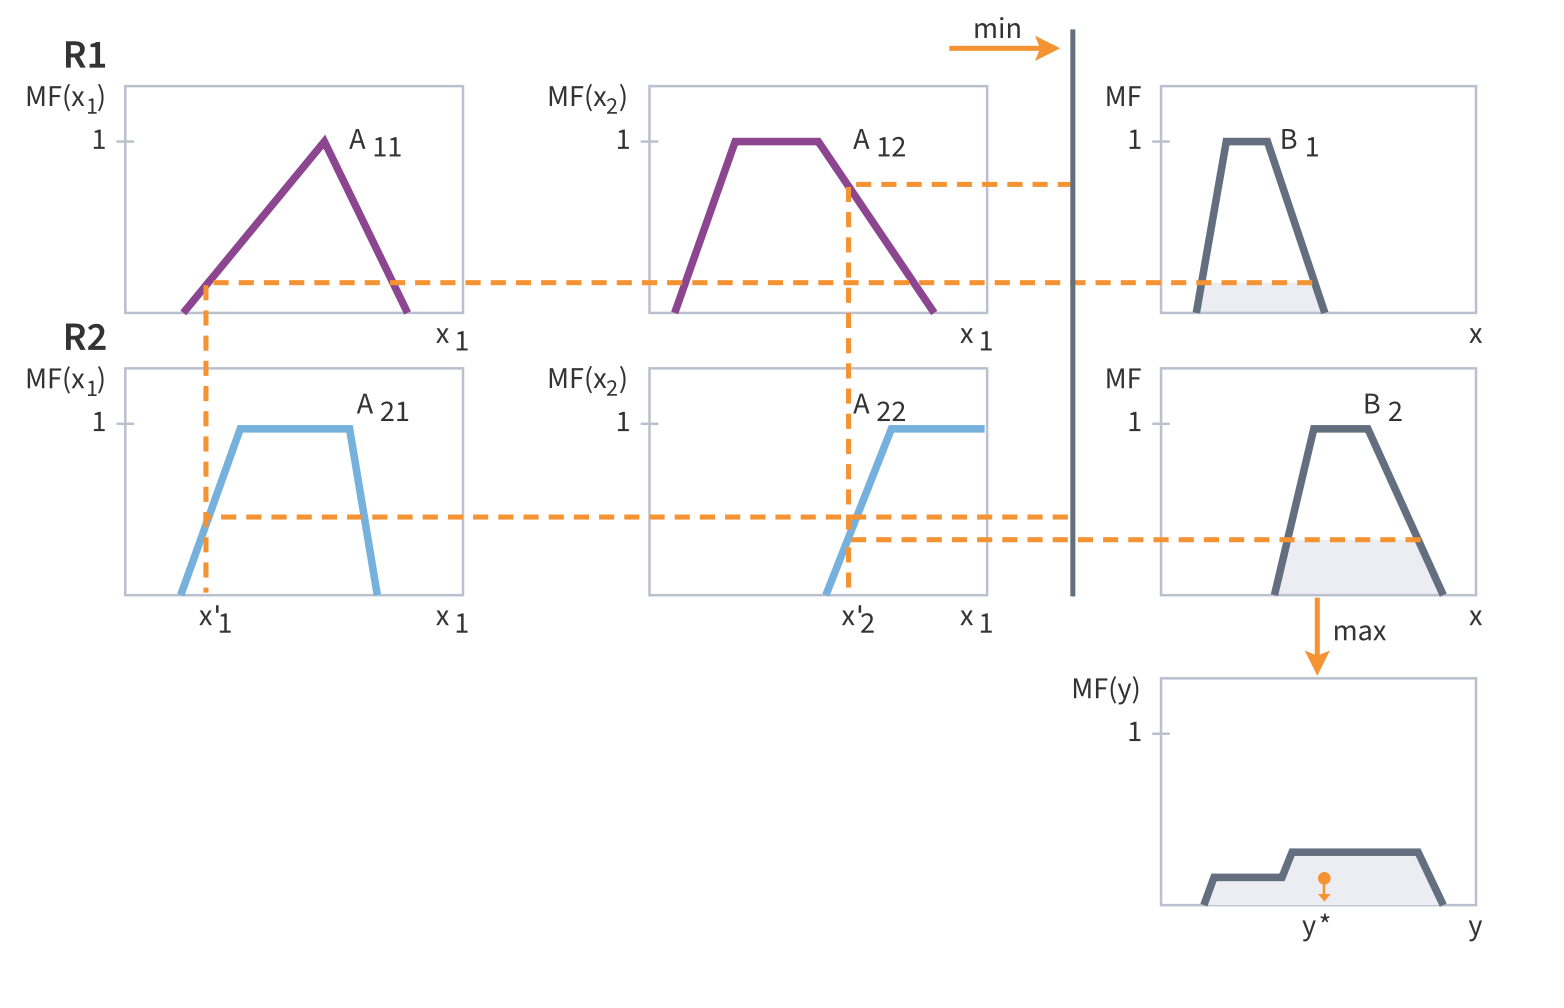

Алгоритм Мамдани

Правило 1

Text(0.85, 0.8, 'A11')

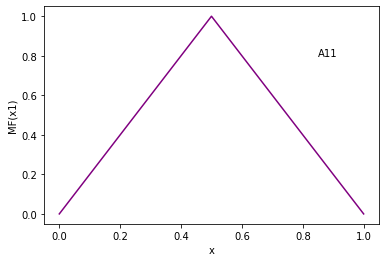

In [ ]:
axis = np.array([0, 0.25, 0.5, 0.75, 1])
a11_points = np.array([0, 0.5, 1, 0.5, 0])
plt.plot(axis, a11_points, 'purple')
plt.ylabel("MF(x1)")
plt.xlabel("x")
plt.text(0.85, 0.8, 'A11')

Правило 2

Text(0.7, 0.8, 'A12')

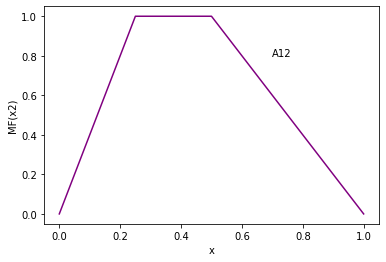

In [ ]:
a12_points = np.array([0, 1, 1, 0.5, 0])
plt.plot(axis, a12_points, 'purple')
plt.ylabel("MF(x2)")
plt.xlabel("x")
plt.text(0.7, 0.8, 'A12')

Text(0.5, 0, 'x')

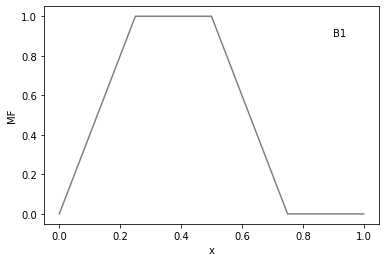

In [ ]:
b1 = np.array([0, 1, 1, 0, 0])
plt.plot(axis, b1, 'gray')
plt.text(0.9, 0.9, 'B1')
plt.ylabel('MF')
plt.xlabel('x')

Правило 3


Text(0.85, 0.8, 'A21')

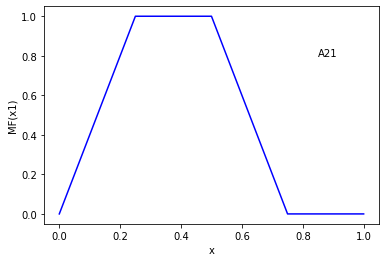

In [ ]:
axis = np.array([0, 0.25, 0.5, 0.75, 1])
a21_points = np.array([0, 1, 1, 0, 0])

plt.plot(axis, a21_points, 'blue')
plt.ylabel("MF(x1)")
plt.xlabel("x")
plt.text(0.85, 0.8, 'A21')

Правило 4


Text(0.85, 0.8, 'A22')

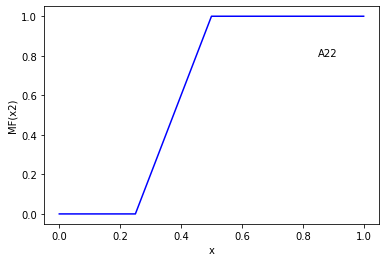

In [ ]:
a22_points = np.array([0, 0, 1, 1, 1])

plt.plot(axis, a22_points, 'blue')
plt.ylabel("MF(x2)")
plt.xlabel("x")
plt.text(0.85, 0.8, 'A22')

Text(0.5, 0, 'x')

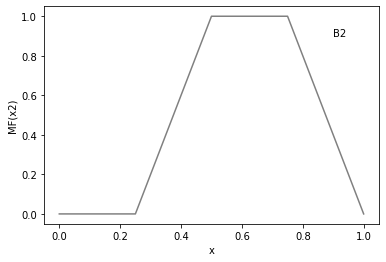

In [ ]:
b2 = np.array([0, 0, 1, 1, 0])
plt.plot(axis, b2, 'gray')
plt.text(0.9, 0.9, 'B2')
plt.ylabel('MF(x2)')
plt.xlabel('x')

Ищем уровни отсечения для нечеткого вывода с использованием операции минимум.

In [ ]:
# взяли уровни 0.25 и 0.5
# 0.25 - индекс 1 в axis, 0.5 соответсвенно 2
alpha1 = fuzzy.fuzzy_and(axis, a11_points[3], axis, a12_points[3])[1]
alpha2 = fuzzy.fuzzy_and(axis, a21_points[2], axis, a22_points[2])[1]
print(alpha1)
print(alpha2)

0.5
1


Поиск учеченной функции принадлежности

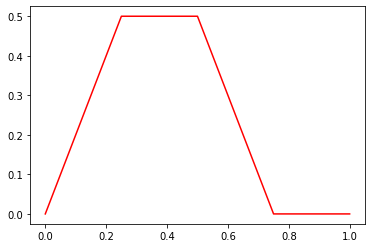

In [ ]:
b1_new = []

for i in b1:
  if i <= alpha1:
    b1_new.append(i)
  else: 
    b1_new.append(alpha1)

plt.plot(axis, b1_new, 'red')

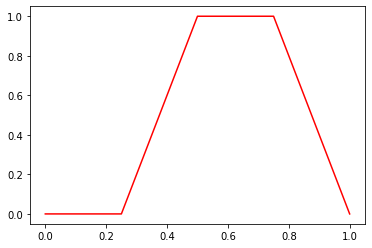

In [ ]:
b2_new = []

for i in b2:
  if i <= alpha2:
    b2_new.append(i)
  else: 
    b2_new.append(alpha1)

plt.plot(axis, b2_new, 'red')

Композиция(максимум)

Text(0.8, 0, 'Результат дефаификации')

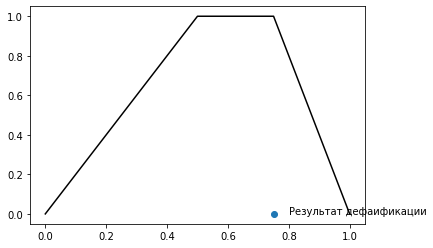

In [ ]:
plt.plot(axis, fuzzy.fuzzy_or(axis, b1_new, axis, b2_new)[1], 'black')
plt.scatter(y, 0)
plt.text(0.8, 0, 'Результат дефаификации')

Пояснение: отсутствие второго "отсечения" или перелома на конечном графике обусловлено тем, что в точке x=0.25 и B1 и B2 возрастают одинаково

Дефаззификация (интеграл <=> площадь под фигурой)

In [ ]:
y = 0.5*1/2 + 0.4*1 + 0.2*1/2
y

0.75